# Imports

In [8]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import glob
import scipy.factorial as factorial

# File reading

In [9]:
def readDotFit(path):
    f1 = open(path, "r")

    #ignore first 12 lines - s will serve as garbage bin
    for i in range(0, 12):
        s = f1.readline()

    #because there is a space between the [ and the first number, lines can be processed using split(" ")
    energy1 = np.array([ float(i) for i in f1.readline().split(" ")[3:-1] ])
    ydata1 = np.array([ float(i) for i in f1.readline().split(" ")[3:-1] ])
    yfit1 = np.array([ float(i) for i in f1.readline().split(" ")[3:-1] ])
    bg1 = np.array([ float(i) for i in f1.readline().split(" ")[3:-1] ])

    f1.close()

    return energy1, ydata1, yfit1, bg1

In [10]:
dat = {"10s": readDotFit(glob.glob("10s_report/*.fit")[0]),
       "20s": readDotFit(glob.glob("20s_report/*.fit")[0]),
       "30s": readDotFit(glob.glob("30s_report/*.fit")[0]),
       "60s": readDotFit(glob.glob("60s_report/*.fit")[0]),
       "2m": readDotFit(glob.glob("2m_report/*.fit")[0]),
       "5m": readDotFit(glob.glob("5m_report/*.fit")[0]),
       "10m": readDotFit(glob.glob("10m_report/*.fit")[0]),
       "20m": readDotFit(glob.glob("20m_report/*.fit")[0]),
       "30m": readDotFit(glob.glob("30m_report/*.fit")[0]),
       "60m": readDotFit(glob.glob("60m_report/*.fit")[0])}

# Plotting

## Raw plots of data

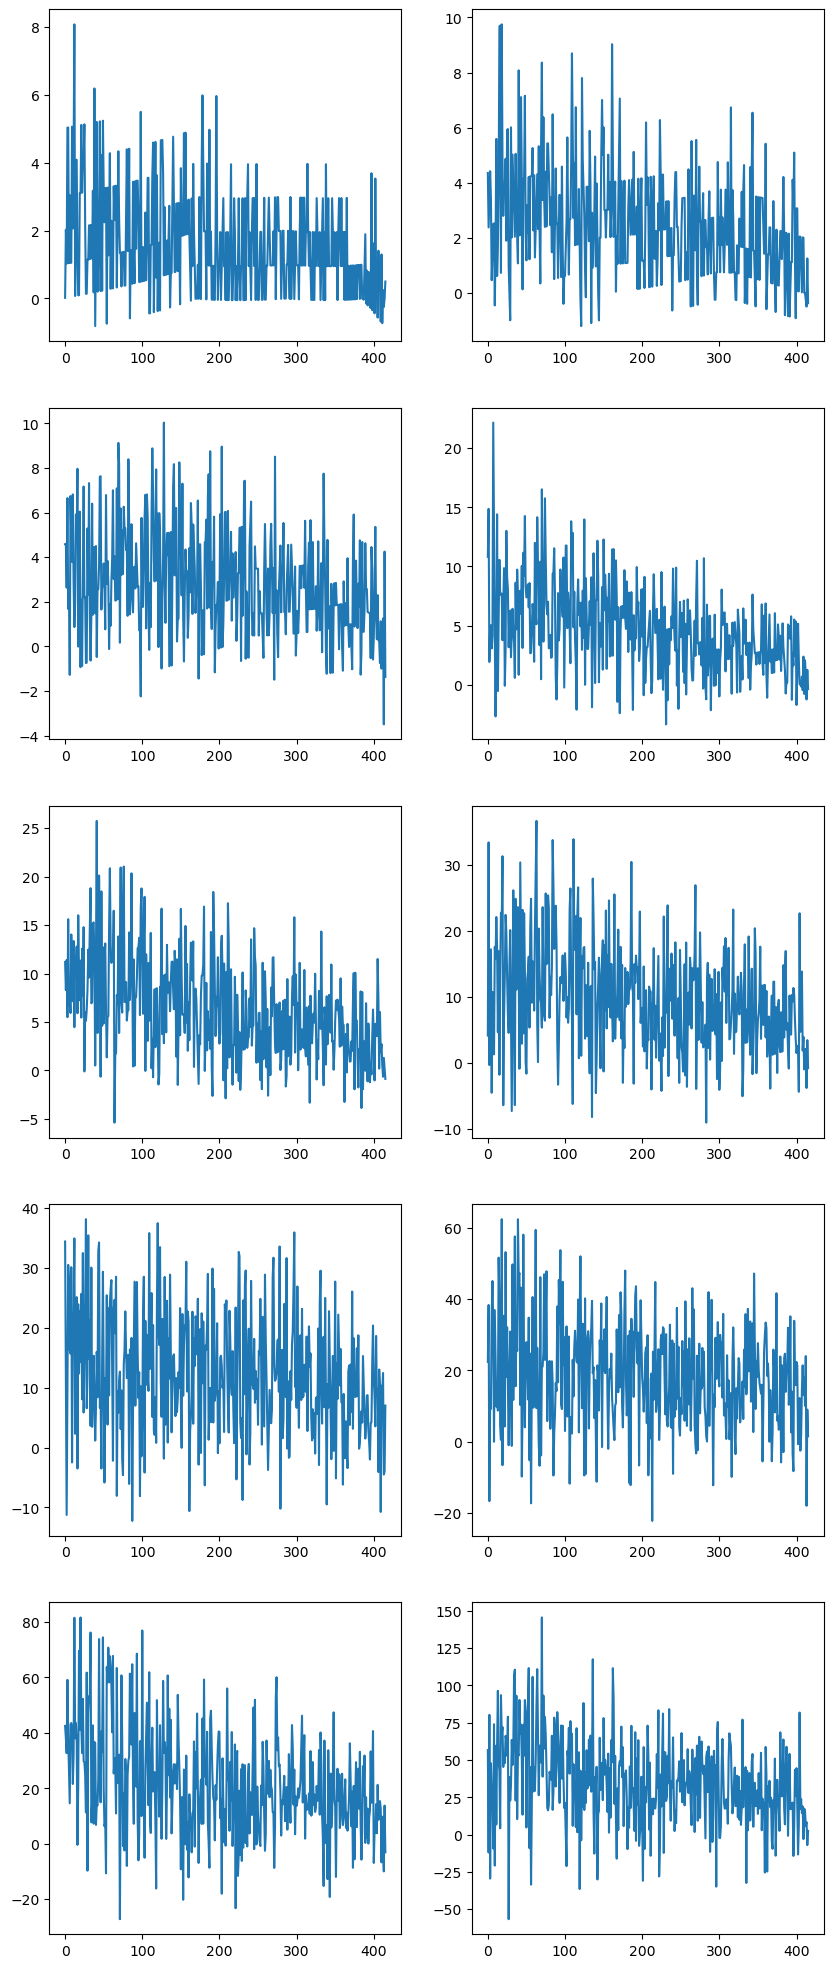

In [28]:
f, axs = plt.subplots(nrows=5, ncols=2, figsize=(10, 25))

axs[0][0].plot(dat["10s"][1][2500:3000] - dat["10s"][3][2500:3000])
axs[0][1].plot(dat["20s"][1][2500:3000] - dat["20s"][3][2500:3000])
axs[1][0].plot(dat["30s"][1][2500:3000] - dat["30s"][3][2500:3000])
axs[1][1].plot(dat["60s"][1][2500:3000] - dat["60s"][3][2500:3000])
axs[2][0].plot(dat["2m"][1][2500:3000] - dat["2m"][3][2500:3000])
axs[2][1].plot(dat["5m"][1][2500:3000] - dat["5m"][3][2500:3000])
axs[3][0].plot(dat["10m"][1][2500:3000] - dat["10m"][3][2500:3000])
axs[3][1].plot(dat["20m"][1][2500:3000] - dat["20m"][3][2500:3000])
axs[4][0].plot(dat["30m"][1][2500:3000] - dat["30m"][3][2500:3000])
axs[4][1].plot(dat["60m"][1][2500:3000] - dat["60m"][3][2500:3000])


plt.show()

## Normal probability plots

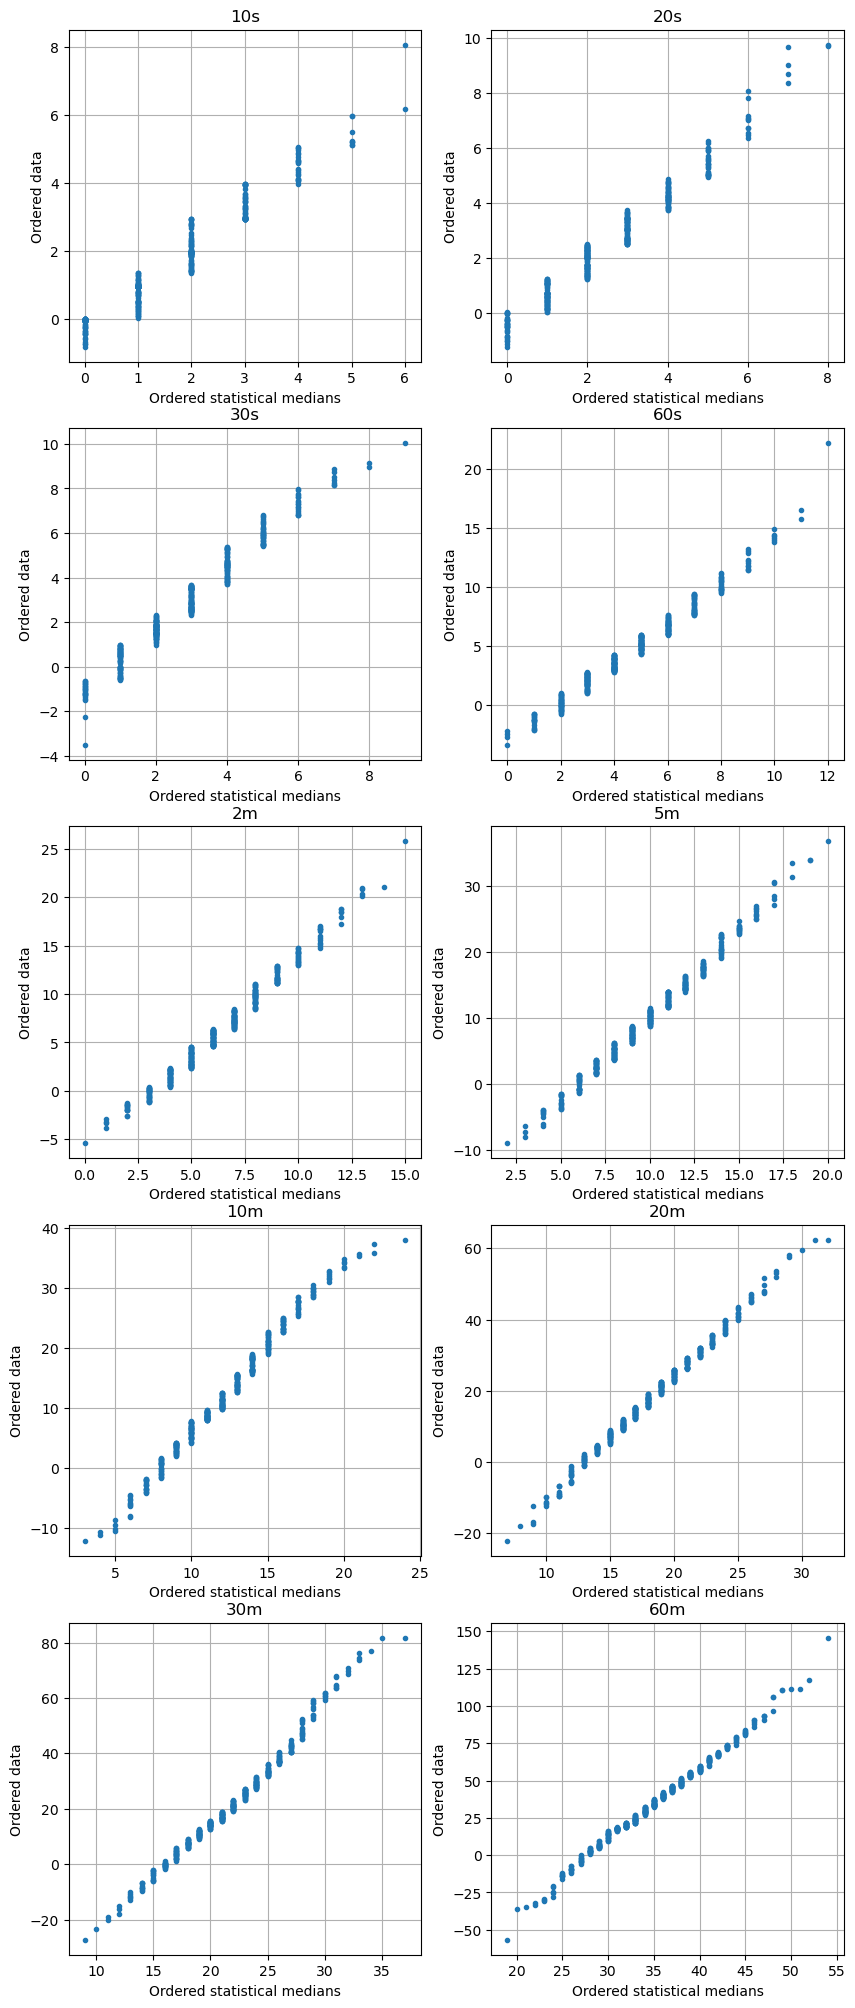

In [24]:
def probPlot(ax, dat, title):
    
    osm, osr = stats.probplot(dat, (np.average(dat)), dist=stats.poisson, fit=False)
    ax.plot(osm, osr, ".") #plot data
    #ax.plot(osm, osm, "-") #plot line y=x
    ax.grid(True)
    ax.ticklabel_format(scilimits=(-5,5))
    ax.set_title(title)
    ax.set_xlabel("Ordered statistical medians")
    ax.set_ylabel("Ordered data")

f, axs = plt.subplots(nrows=5, ncols=2, figsize=(10, 25))

probPlot(axs[0][0], dat["10s"][1][2500:] - dat["10s"][3][2500:], "10s")
probPlot(axs[0][1], dat["20s"][1][2500:] - dat["20s"][3][2500:], "20s")
probPlot(axs[1][0], dat["30s"][1][2500:] - dat["30s"][3][2500:], "30s")
probPlot(axs[1][1], dat["60s"][1][2500:] - dat["60s"][3][2500:], "60s")
probPlot(axs[2][0], dat["2m"][1][2500:] - dat["2m"][3][2500:], "2m")
probPlot(axs[2][1], dat["5m"][1][2500:] - dat["5m"][3][2500:], "5m")
probPlot(axs[3][0], dat["10m"][1][2500:] - dat["10m"][3][2500:], "10m")
probPlot(axs[3][1], dat["20m"][1][2500:] - dat["20m"][3][2500:], "20m")
probPlot(axs[4][0], dat["30m"][1][2500:] - dat["30m"][3][2500:], "30m")
probPlot(axs[4][1], dat["60m"][1][2500:] - dat["60m"][3][2500:], "60m")

plt.show()

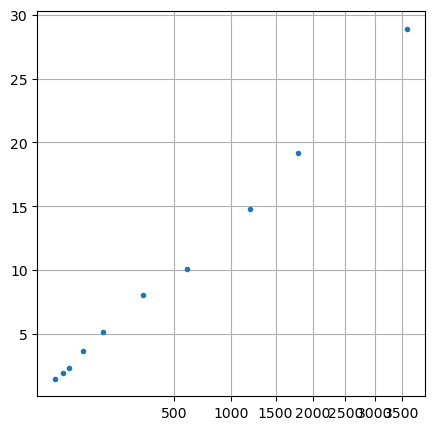

In [43]:
f, ax = plt.subplots(figsize=(5, 5))

times = np.array([10, 20, 30, 60, 120, 300, 600, 1200, 1800, 3600])

stds=[]

for i in list(dat):
    stds.append(np.std(dat[i][1][2500:3000] - dat[i][3][2500:3000]))

stds = np.array(stds)

ax.set_xscale("function", functions=(np.sqrt, lambda x: x*x))
ax.plot(times, stds, ".")

ax.grid(True)

plt.show()